In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import datasets, decomposition, svm
from sklearn.model_selection import train_test_split
import numpy as np

(400, 64, 64)


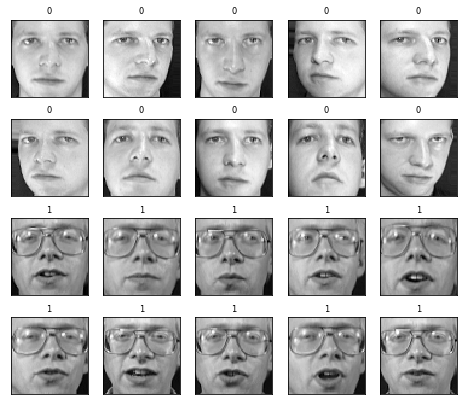

In [12]:
# fetch dataset
dataset = datasets.fetch_olivetti_faces()
print(dataset.images.shape)


fig = plt.figure(figsize=(8, 7))

for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(dataset.images[i], cmap=plt.cm.gist_gray)
    ax.set_title(dataset.target[i],
                 fontsize='small', color='black')

In [3]:
# split dataset into training and test data
img_train, img_test, class_train, class_test = train_test_split(dataset.data,
        dataset.target, random_state=0)

print("Train: {} Test: {}".format(img_train.shape, img_test.shape))

Train: (300, 4096) Test: (100, 4096)


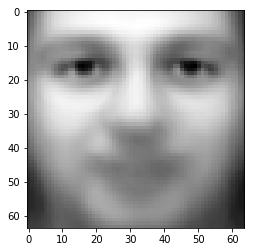

In [13]:
# pca
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(img_train)

#mean
plt.imshow(pca.mean_.reshape(dataset.images[0].shape),
           cmap=plt.cm.gist_gray)

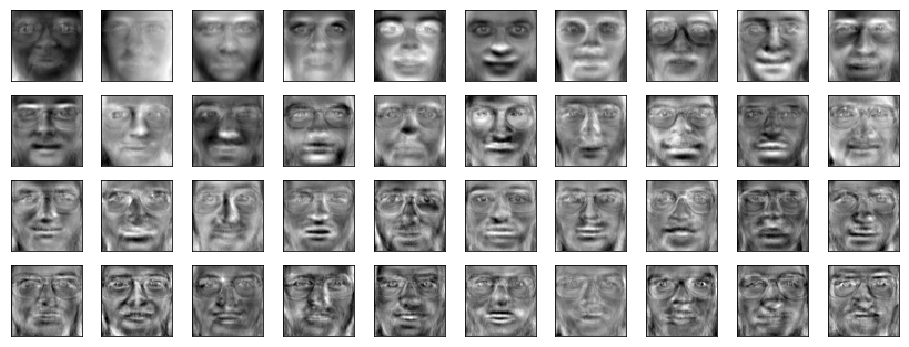

In [14]:
# Eigenfaces
fig = plt.figure(figsize=(16, 6))
for i in range(40):
    ax = fig.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(dataset.images[0].shape),
              cmap=plt.cm.gist_gray)

---

In [6]:
#dim reduction
img_train_pca = pca.transform(img_train)
img_test_pca = pca.transform(img_test)

# SVM
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(img_train_pca, class_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

95


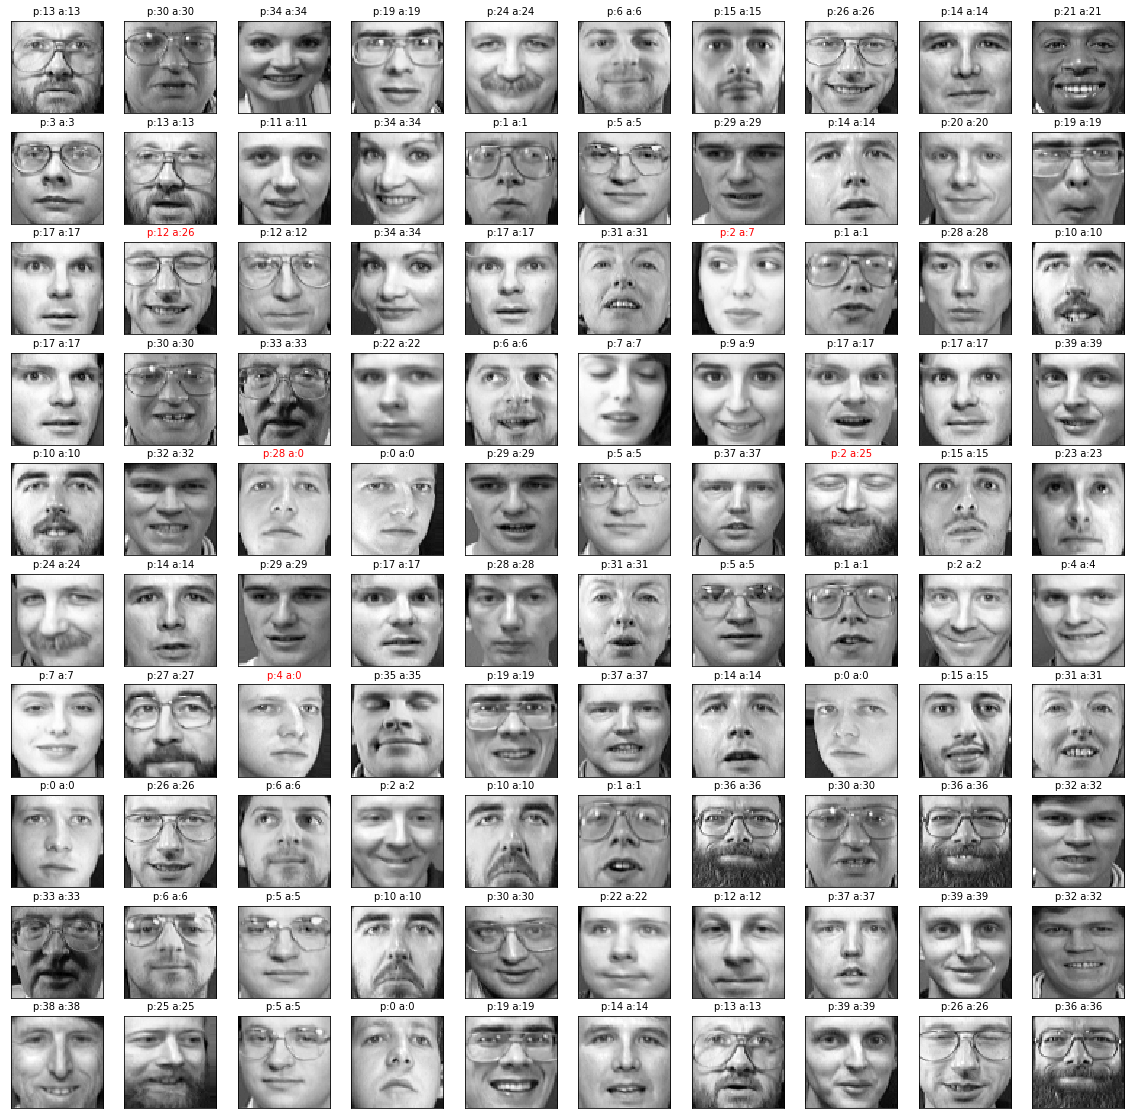

In [17]:
count = 0;
fig = plt.figure(figsize=(20, 20))
for i in range(img_test.shape[0]):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(img_test[i].reshape(dataset.images[0].shape), cmap=plt.cm.gist_gray)
    class_pred = clf.predict(img_test_pca[i, np.newaxis])[0]
    color = ('black' if class_pred == class_test[i] else 'red')
    count = count + (1 if class_pred == class_test[i] else 0)
    ax.set_title("p:" + str(class_pred) + " a:" + str(class_test[i]),
                 fontsize='medium', color=color)

print(count)